In [8]:
from sys import argv
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
from keras.models import load_model
from keras.utils import plot_model, np_utils
from sklearn.metrics import confusion_matrix
import keras.backend as K


In [75]:
x = []
y = []

n_row = 0
text = open('train.csv', 'r') 
row = csv.reader(text , delimiter=",")
for r in row:
	if n_row != 0:
		y.append(r[0])
		r[1] = np.array(r[1].split(' '))
		r[1] = np.reshape(r[1], (1, 48, 48))
		x.append(r[1])
	n_row = n_row+1
text.close()
x = np.array(x)
y = np.array(y)
x = x.astype(np.float64)
x = x/255
y = y.astype(np.int)
y = np_utils.to_categorical(y, num_classes=7)

In [62]:
model = load_model('AUG_final_8.hdf5')

In [57]:
label = ["angry", "disgust", "fear", "happy", "sad", "suprise", "neutral"]

In [58]:
model_name = 'hw3_Q4'

print saliency map...
plot figure 3579.
plot figure 573.
plot figure 17824.
plot figure 4865.
plot figure 26.
plot figure 15586.
plot figure 12006.


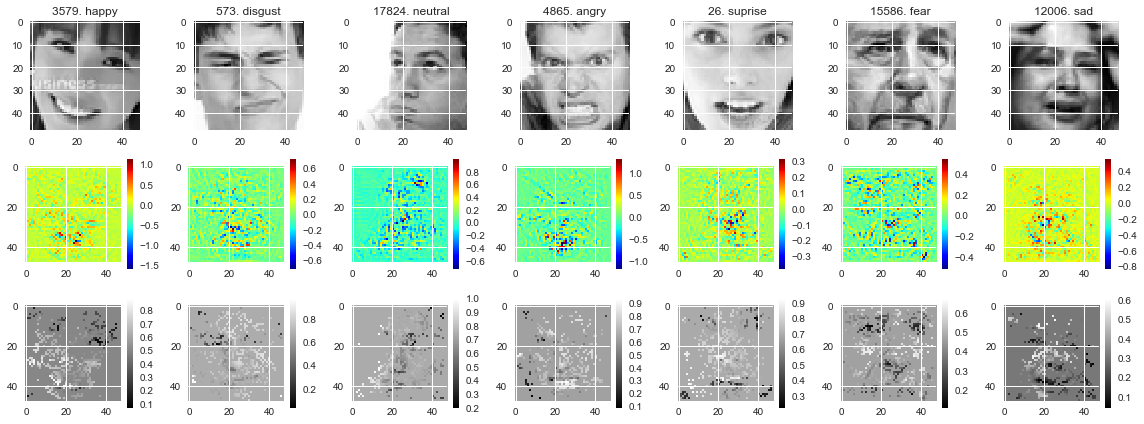

In [76]:
print("print saliency map...")
plt.figure(figsize=(16, 6))
emotion_classifier = model
input_img = emotion_classifier.input
img_ids = [(1, 3579), (2, 573), (3, 17824), (4, 4865), (5, 26), (6, 15586), (7, 12006)]
for i, idx in img_ids:

    print("plot figure %d." % idx)
    img = x[idx].reshape(1, 1, 48, 48)
    val_proba = emotion_classifier.predict(img)
    pred = val_proba.argmax(axis=-1)
    target = K.mean(emotion_classifier.output[:, pred])
    grads = K.gradients(target, input_img)[0]
    fn = K.function([input_img, K.learning_phase()], [grads])

    heatmap = fn([img, 0])[0]
    heatmap = heatmap.reshape(48, 48)
    std = np.std(heatmap)
    mean = np.mean(heatmap)
    heaptmap = (heatmap-mean)/(std+1e-5)
    #heatmap -= heatmap.mean()
    #heatmap /= heatmap.std()

    see = img.reshape(48, 48)
    plt.subplot(3, 7, i)
    plt.imshow(see, cmap='gray')
    plt.title("%d. %s" % (idx, label[y[idx].argmax()]) )

    thres = heatmap.std()
    see[np.where(abs(heatmap) <= thres)] = np.mean(see)

    plt.subplot(3, 7, i+7)
    plt.imshow(heatmap, cmap='jet')
    plt.colorbar()
    plt.tight_layout()

    plt.subplot(3, 7, i+14)
    plt.imshow(see,cmap='gray')
    plt.colorbar()
    plt.tight_layout()

plt.savefig("%s_sm_test.png" % model_name[:-3], dpi=100)
plt.show()
